In [8]:
import os
import pandas as pd

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [9]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wslin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wslin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words('english'))

In [11]:
def get_tidyTweet(s):
    url_pattern = re.compile(r'https?://\S+')
    no_url = url_pattern.sub(r'', str(s))
    username_pattern = re.compile(r'@\w+')
    no_username = username_pattern.sub(r'', no_url)
    hashtag_pattern = re.compile(r'#\w+')
    no_hashtag = hashtag_pattern.sub(r'', no_username)
    amp_pattern = re.compile(r'&amp;')
    tidy_tweet = amp_pattern.sub(r'and', no_hashtag)
    return tidy_tweet

def remove_punct(s):
    punct_pattern = re.compile(r'[^\w\s\']')
    no_punct = punct_pattern.sub(r'', str(s))
    return no_punct

def normalize_words(tokens):
    norm_tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return norm_tokens

def remove_stopwords(tokens):
    result_tokens = []
    for t in tokens:
        if (t not in stopword and len(t) > 2 and not t.isnumeric()):
            result_tokens.append(t)
    return result_tokens

def words_preprocessing(tweet):
    tidy_tweet = get_tidyTweet(tweet).lower()
    tidy_tweet = remove_punct(tidy_tweet)
    tokens = tidy_tweet.split()
    norm_tokens = normalize_words(tokens)
    result_tokens = remove_stopwords(norm_tokens)
    return result_tokens

In [12]:
df = pd.read_csv('./conspiracy_theories_data.csv')
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [13]:
df_words = df['tweet'].apply(words_preprocessing)
df_words = df_words[df_words.str.len()!=0]
df_words = df_words.reset_index(drop=True)

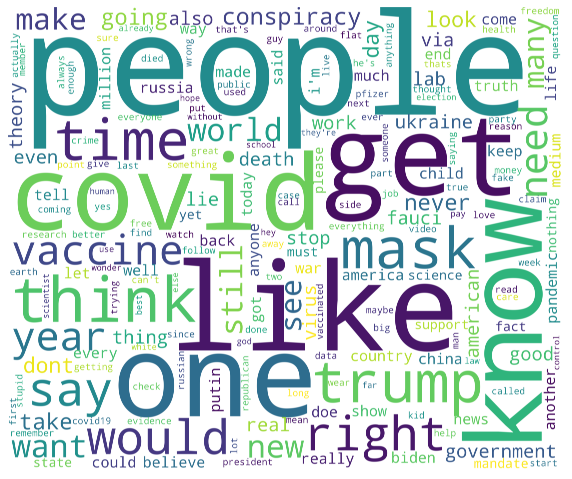

In [14]:
word_list = list(df_words.explode())
nltk_count = nltk.FreqDist(word_list)
wordcloud = WordCloud(
    background_color='white',
    scale=20,
    height=500,
    width=600,
    ).generate_from_frequencies(nltk_count)

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
fig.savefig('wordcloud.png')

In [15]:
frequency = {}
for k, v in nltk_count.most_common(100):
    frequency[k] = v/len(df)
print('Top 50 most frequent tokens in D1:')
print(frequency)

Top 50 most frequent tokens in D1:
{'people': 0.08371246587807098, 'like': 0.06022003474232773, 'one': 0.05285797005542228, 'get': 0.050541814873025066, 'know': 0.04466870708908925, 'covid': 0.04375878898171892, 'think': 0.0388783191330962, 'trump': 0.03805112085366862, 'time': 0.03738936223012656, 'mask': 0.037141202746298285, 'right': 0.036727603606584495, 'say': 0.03647944412275622, 'would': 0.03647944412275622, 'vaccine': 0.035817685499214165, 'year': 0.03573496567127141, 'need': 0.03391512945653073, 'world': 0.031102655306476962, 'want': 0.030275457027049382, 'new': 0.029944577715278354, 'still': 0.02845562081230871, 'see': 0.027132103565224584, 'make': 0.026966663909339068, 'many': 0.026966663909339068, 'conspiracy': 0.02647034494168252, 'going': 0.025312267350483912, 'never': 0.02506410786665564, 'take': 0.02456778889899909, 'dont': 0.023244271651914963, 'look': 0.022417073372487384, 'day': 0.022334353544544626, 'government': 0.02183803457688808, 'thing': 0.021755314748945324, '

In [16]:
df_freq = pd.DataFrame(nltk_count.most_common(20), columns=['word', 'count'])

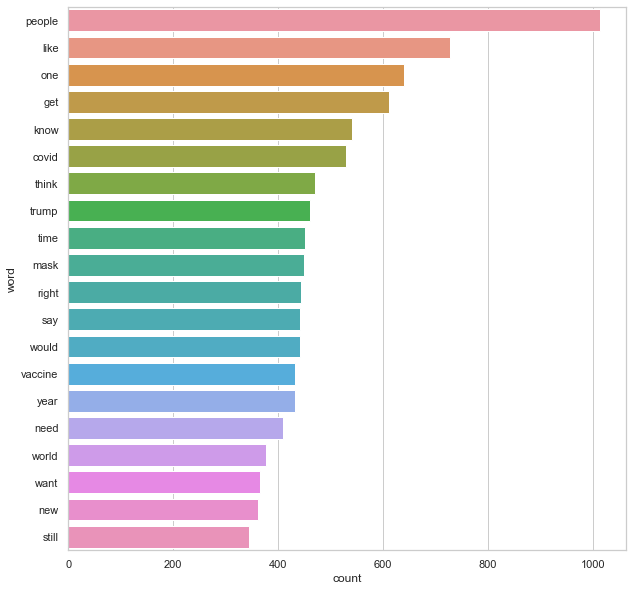

In [17]:
fig1 = plt.figure(figsize=(10, 10))
sns.set_theme(style='whitegrid')
sns.barplot(x='count', y='word', data=df_freq)
plt.show()
fig1.savefig('Top50_tokens.png')